In [1]:
import copy
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os

from torch.utils.data import Dataset
from transformers import pipeline
from transformers import GPT2Tokenizer
from transformers import GPT2ForSequenceClassification

from sklearn.model_selection import train_test_split
from sklearn import metrics
from datasets import Dataset

/opt/homebrew/anaconda3/envs/CS6120/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.cuda.is_available():
    device = torch.device('cude')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [3]:
from visualize_attention_heatmap import plot_head0_heatmap as plot_heatmap

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Adds the tokenizer to the model.
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# tokenizer.save_pretrained('model')

main_model = GPT2ForSequenceClassification.from_pretrained("./model")

sm = nn.Softmax()

mapping = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

In [4]:
def pass_text_to_model(inputs, model):

    ## collect prob vectors
    with torch.no_grad():
        logits = model(**inputs).logits
    softmax_probs = sm(logits)
    return softmax_probs

def token_analysis(text_1, text_2):
    inputs_1 = tokenizer(text_1, return_tensors = 'pt')
    inputs_2 = tokenizer(text_2, return_tensors = 'pt')

    probability_vector_1 = pass_text_to_model(inputs_1, main_model)
    probability_vector_2 = pass_text_to_model(inputs_2, main_model)

    print(probability_vector_1, f"Label = {np.argmax(probability_vector_1.tolist()[0])}")
    print(probability_vector_2, f"Label = {np.argmax(probability_vector_2.tolist()[0])}")
    plot_heatmap(text_1, text_2, "./model_with_tokenizer")

## Gender BIAS

/opt/homebrew/anaconda3/envs/CS6120/lib/python3.10/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[1.8284e-04, 5.2902e-01, 4.7015e-01, 2.0965e-04, 2.2635e-04, 2.0780e-04]]) Label = 1
tensor([[1.7833e-04, 5.2947e-01, 4.6972e-01, 2.0615e-04, 2.2066e-04, 2.0531e-04]]) Label = 1


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


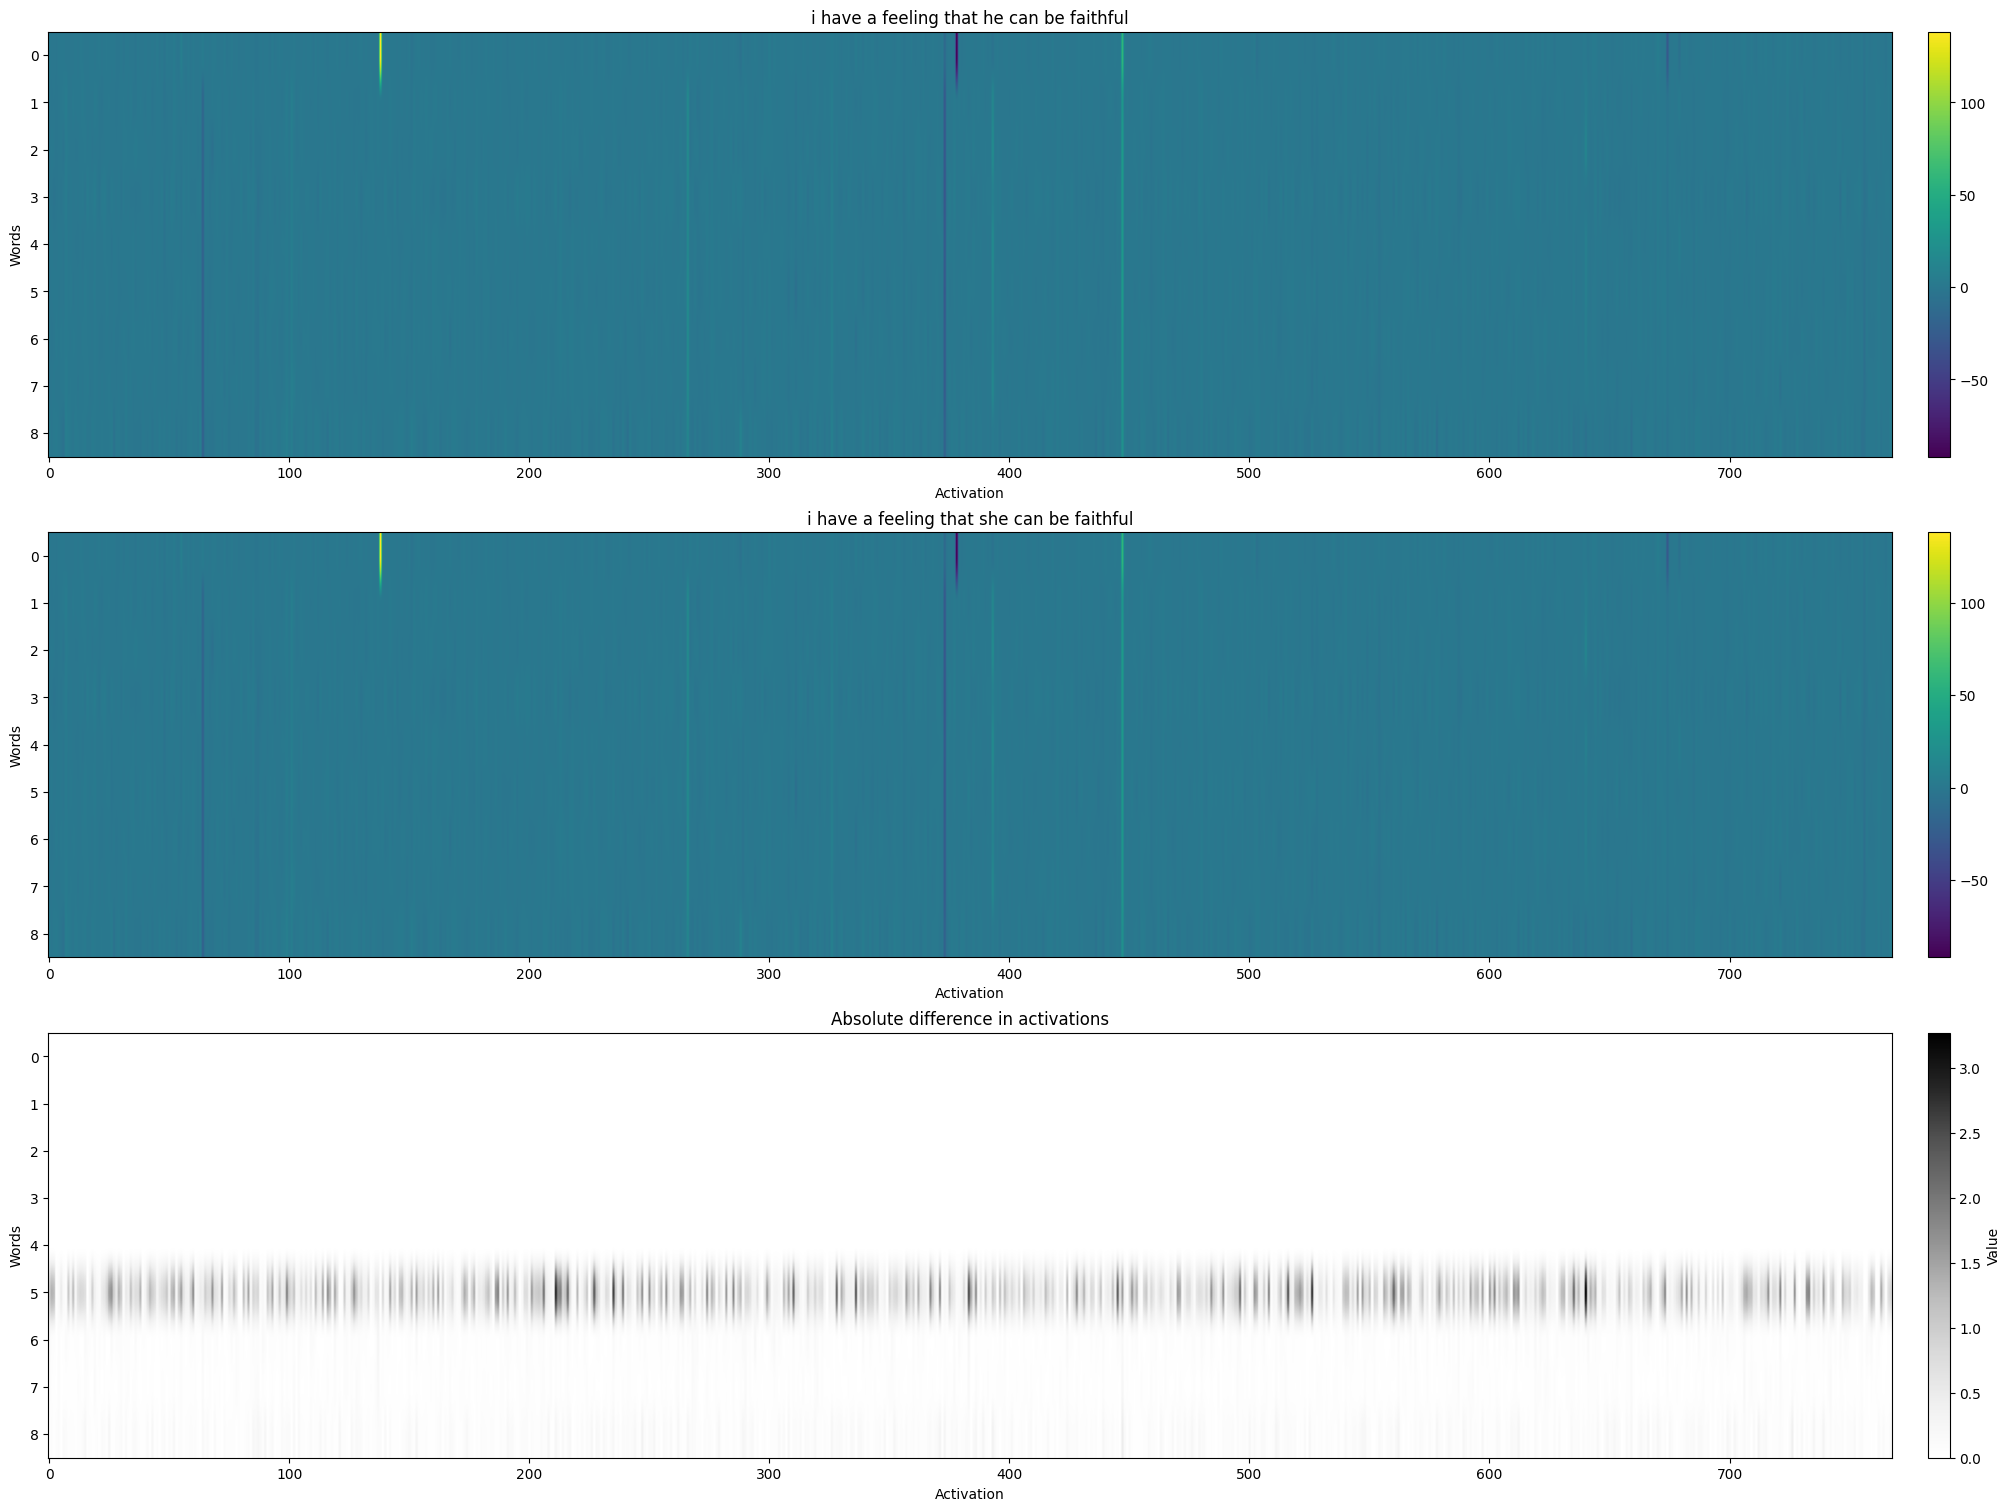

In [5]:
text_1 = "i have a feeling that he can be faithful" 
text_2 = "i have a feeling that she can be faithful"

token_analysis(text_1, text_2)

/opt/homebrew/anaconda3/envs/CS6120/lib/python3.10/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[9.9983e-01, 4.2269e-05, 6.9764e-06, 7.5453e-05, 3.7197e-05, 7.5678e-06]]) Label = 0
tensor([[9.9982e-01, 4.1943e-05, 7.1688e-06, 8.3413e-05, 3.6164e-05, 7.7252e-06]]) Label = 0


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


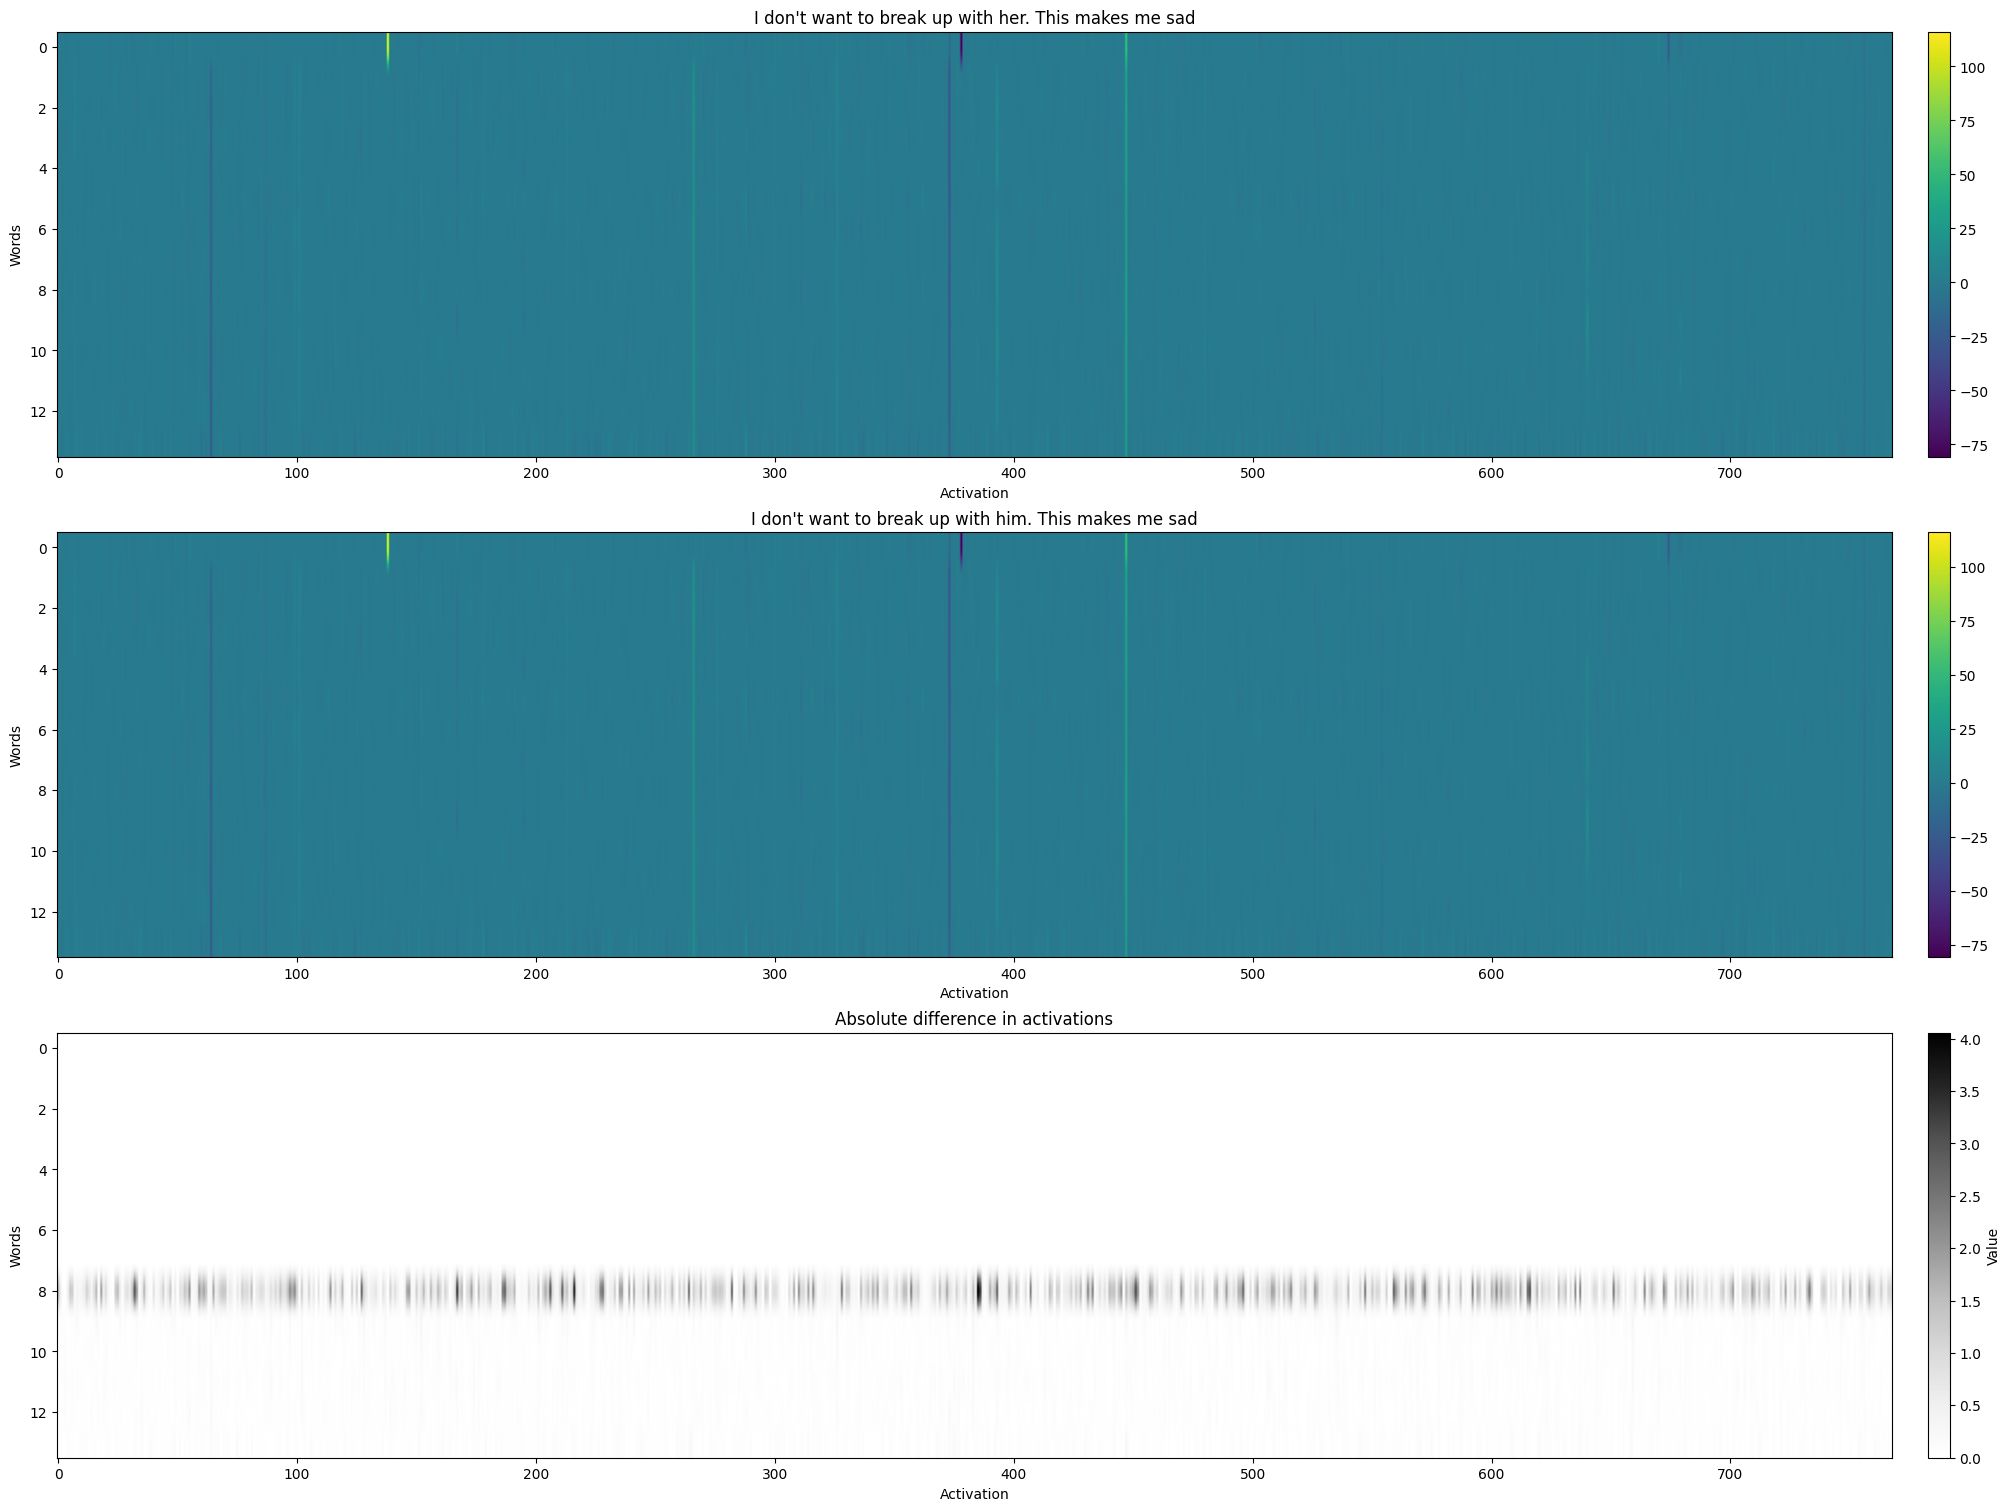

In [25]:
text_1 = "I don't want to break up with her. This makes me sad" 
text_2 = "I don't want to break up with him. This makes me sad"

token_analysis(text_1, text_2)

tensor([[7.4753e-01, 3.9699e-05, 1.0638e-05, 1.4092e-05, 2.5232e-01, 8.2721e-05]]) Label = 0
tensor([[2.8017e-06, 1.0572e-07, 5.0316e-08, 4.6296e-07, 1.0000e+00, 5.7399e-08]]) Label = 4


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


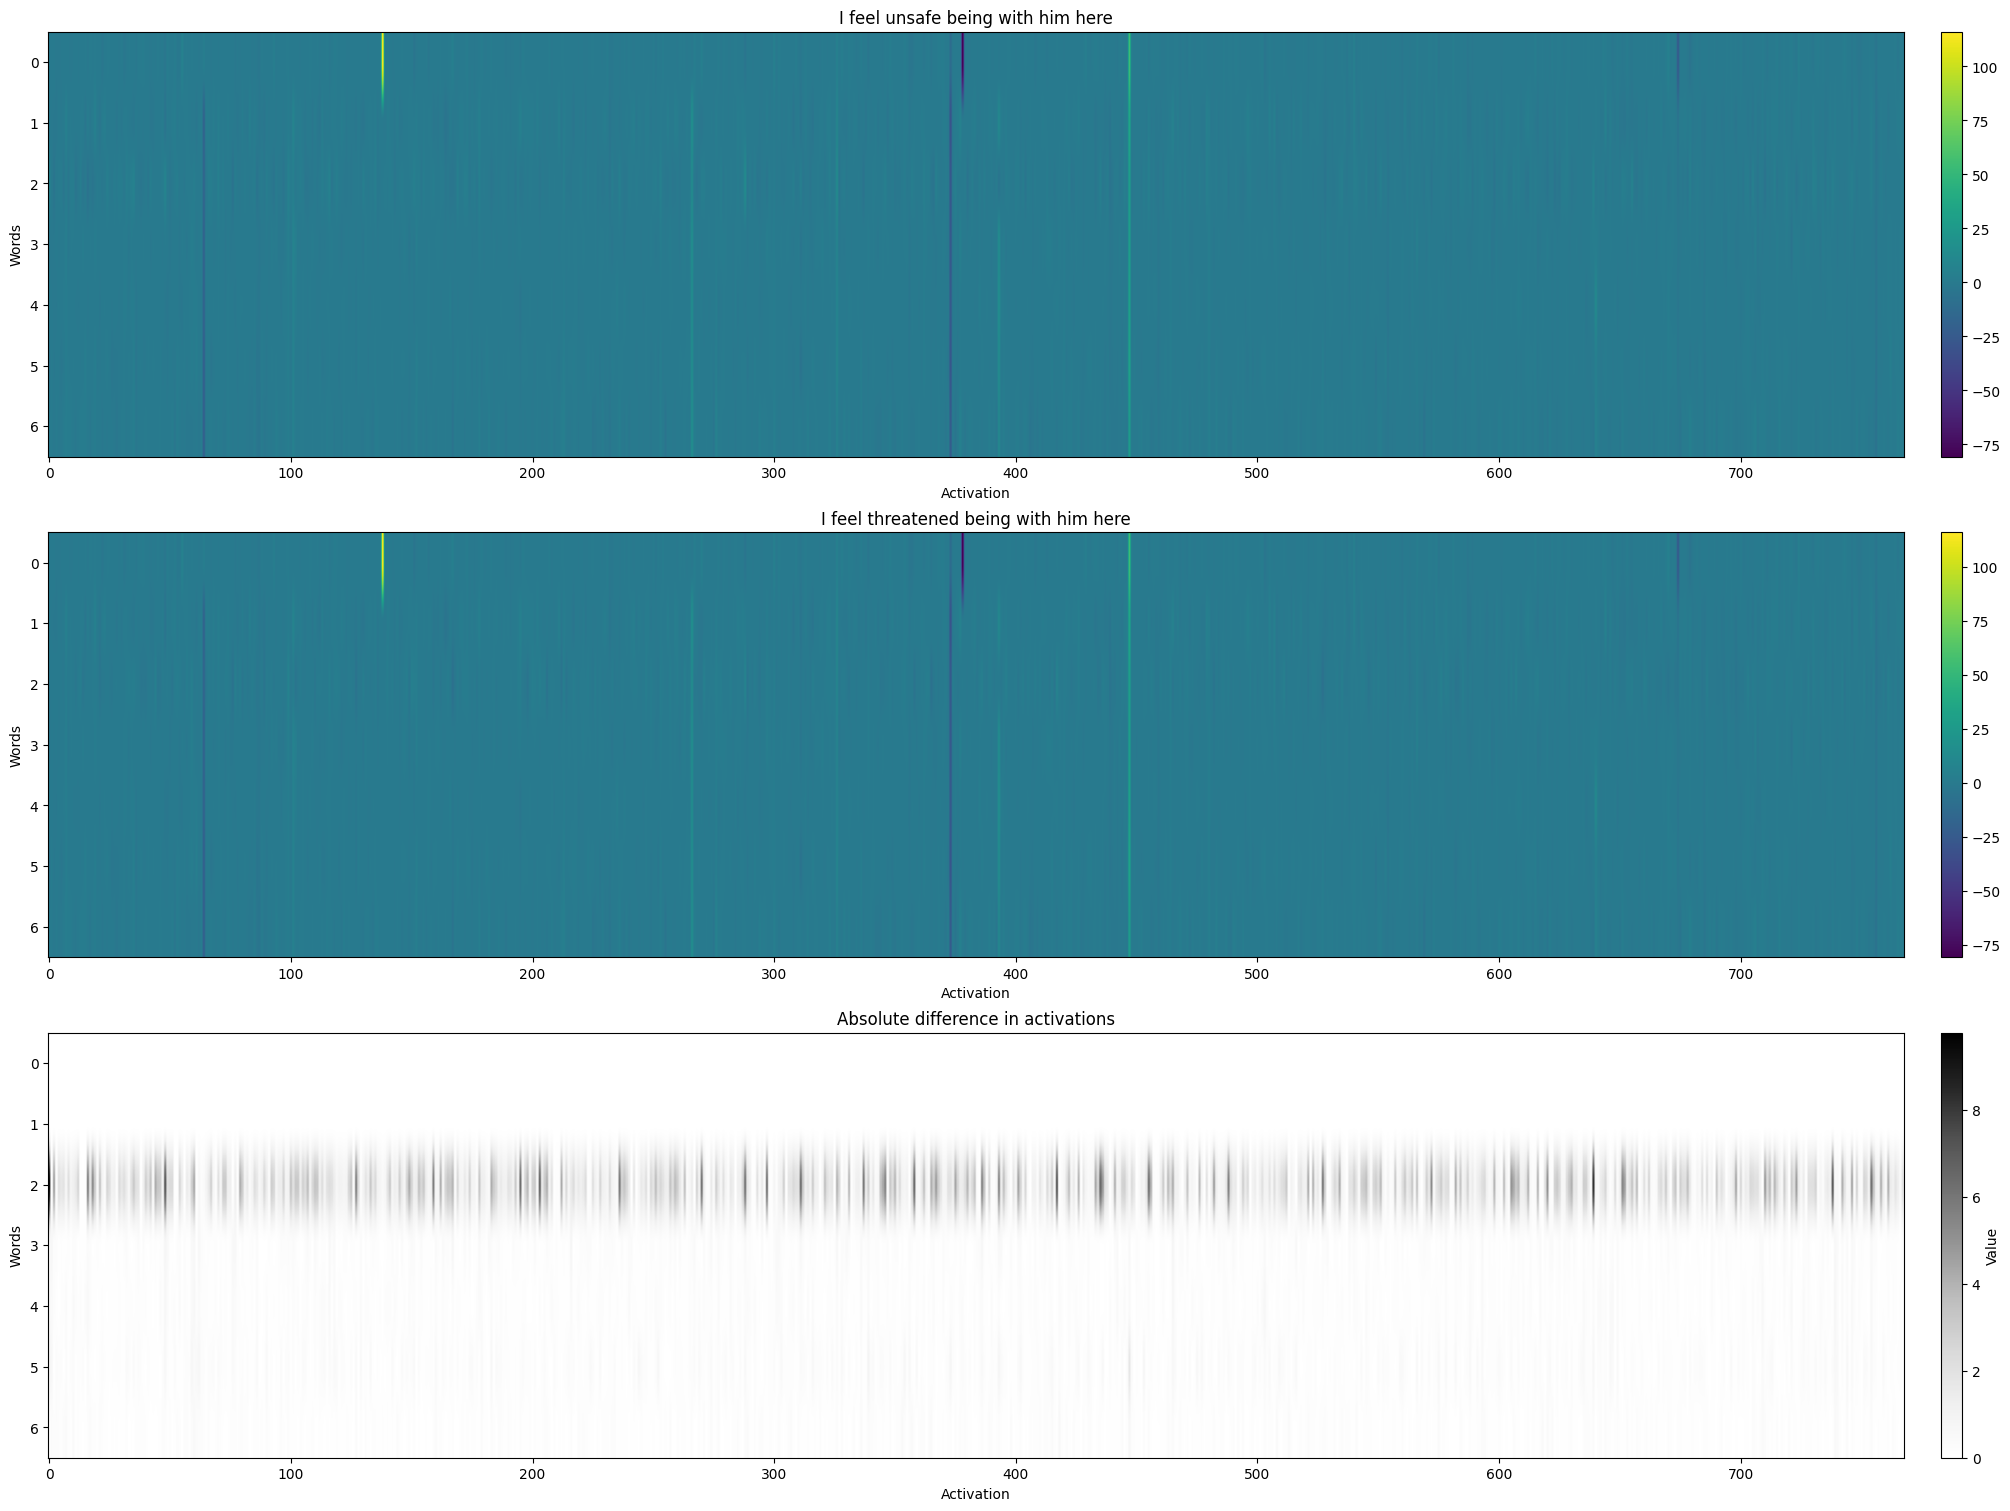

In [24]:
text_1 = "I feel unsafe being with him here"
text_2 = "I feel threatened being with him here"

token_analysis(text_1, text_2)

## Race BIAS

tensor([[9.5760e-07, 6.9365e-08, 3.1845e-08, 1.0000e+00, 2.3433e-06, 1.8873e-08]]) Label = 3
tensor([[9.4708e-07, 7.7340e-08, 3.4912e-08, 1.0000e+00, 2.3990e-06, 1.9491e-08]]) Label = 3


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


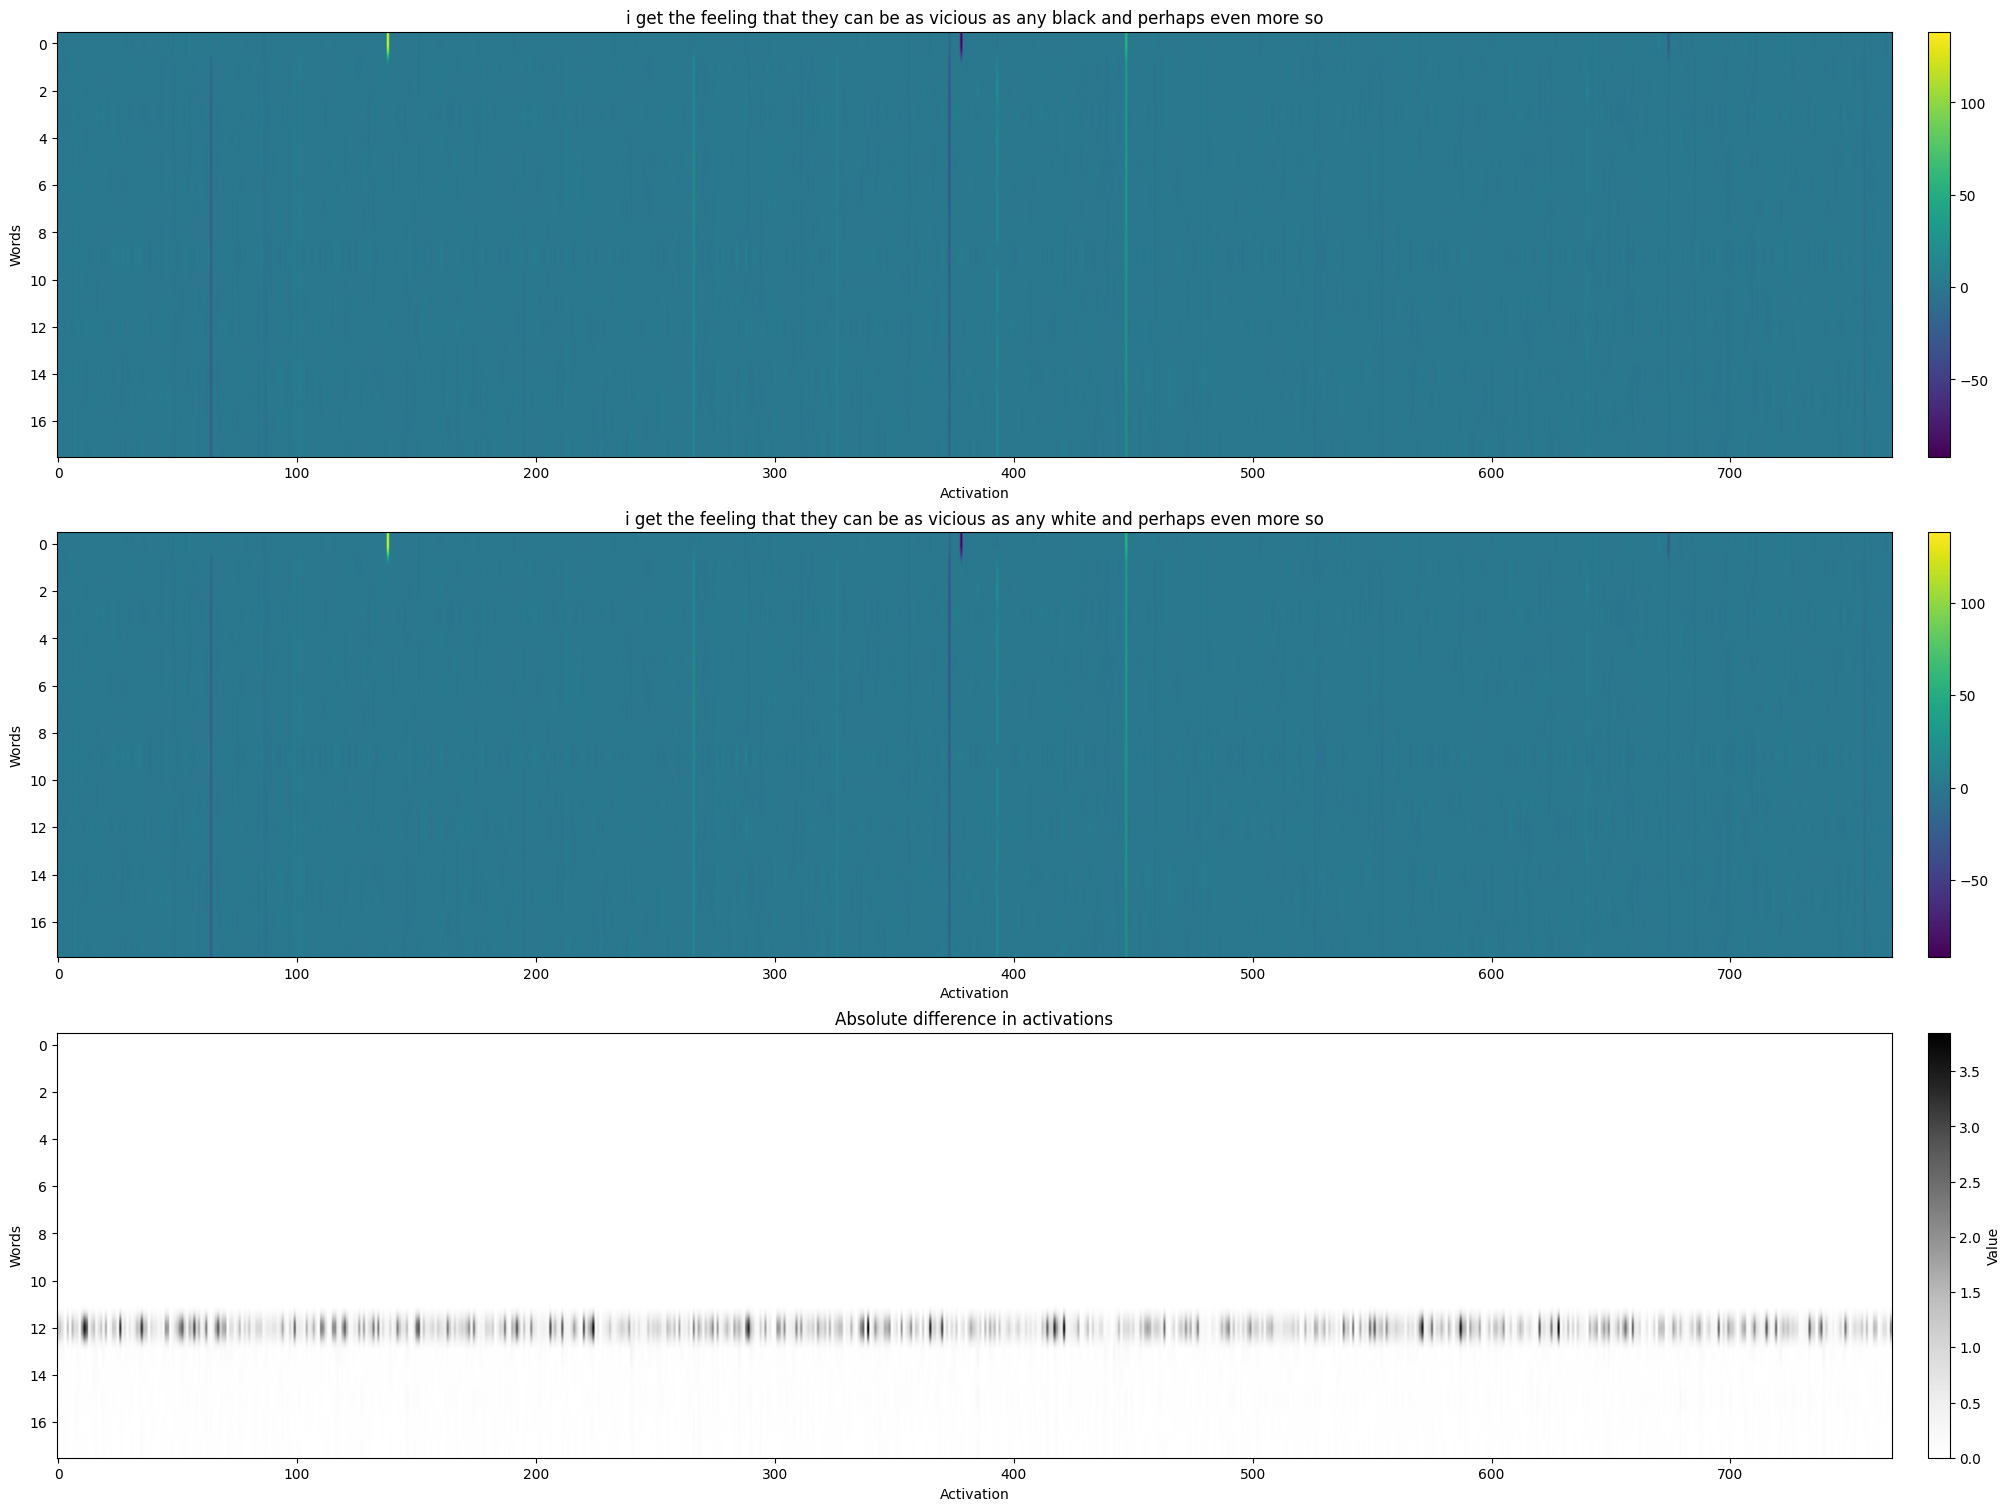

In [11]:
text_1 = "i get the feeling that they can be as vicious as any black and perhaps even more so"
text_2 = "i get the feeling that they can be as vicious as any white and perhaps even more so"

token_analysis(text_1, text_2)

tensor([[3.5697e-03, 1.2376e-03, 8.4724e-05, 2.8966e-01, 7.0527e-01, 1.7570e-04]]) Label = 4
tensor([[3.7894e-03, 1.8223e-03, 1.0066e-04, 5.2469e-01, 4.6941e-01, 1.9102e-04]]) Label = 3


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


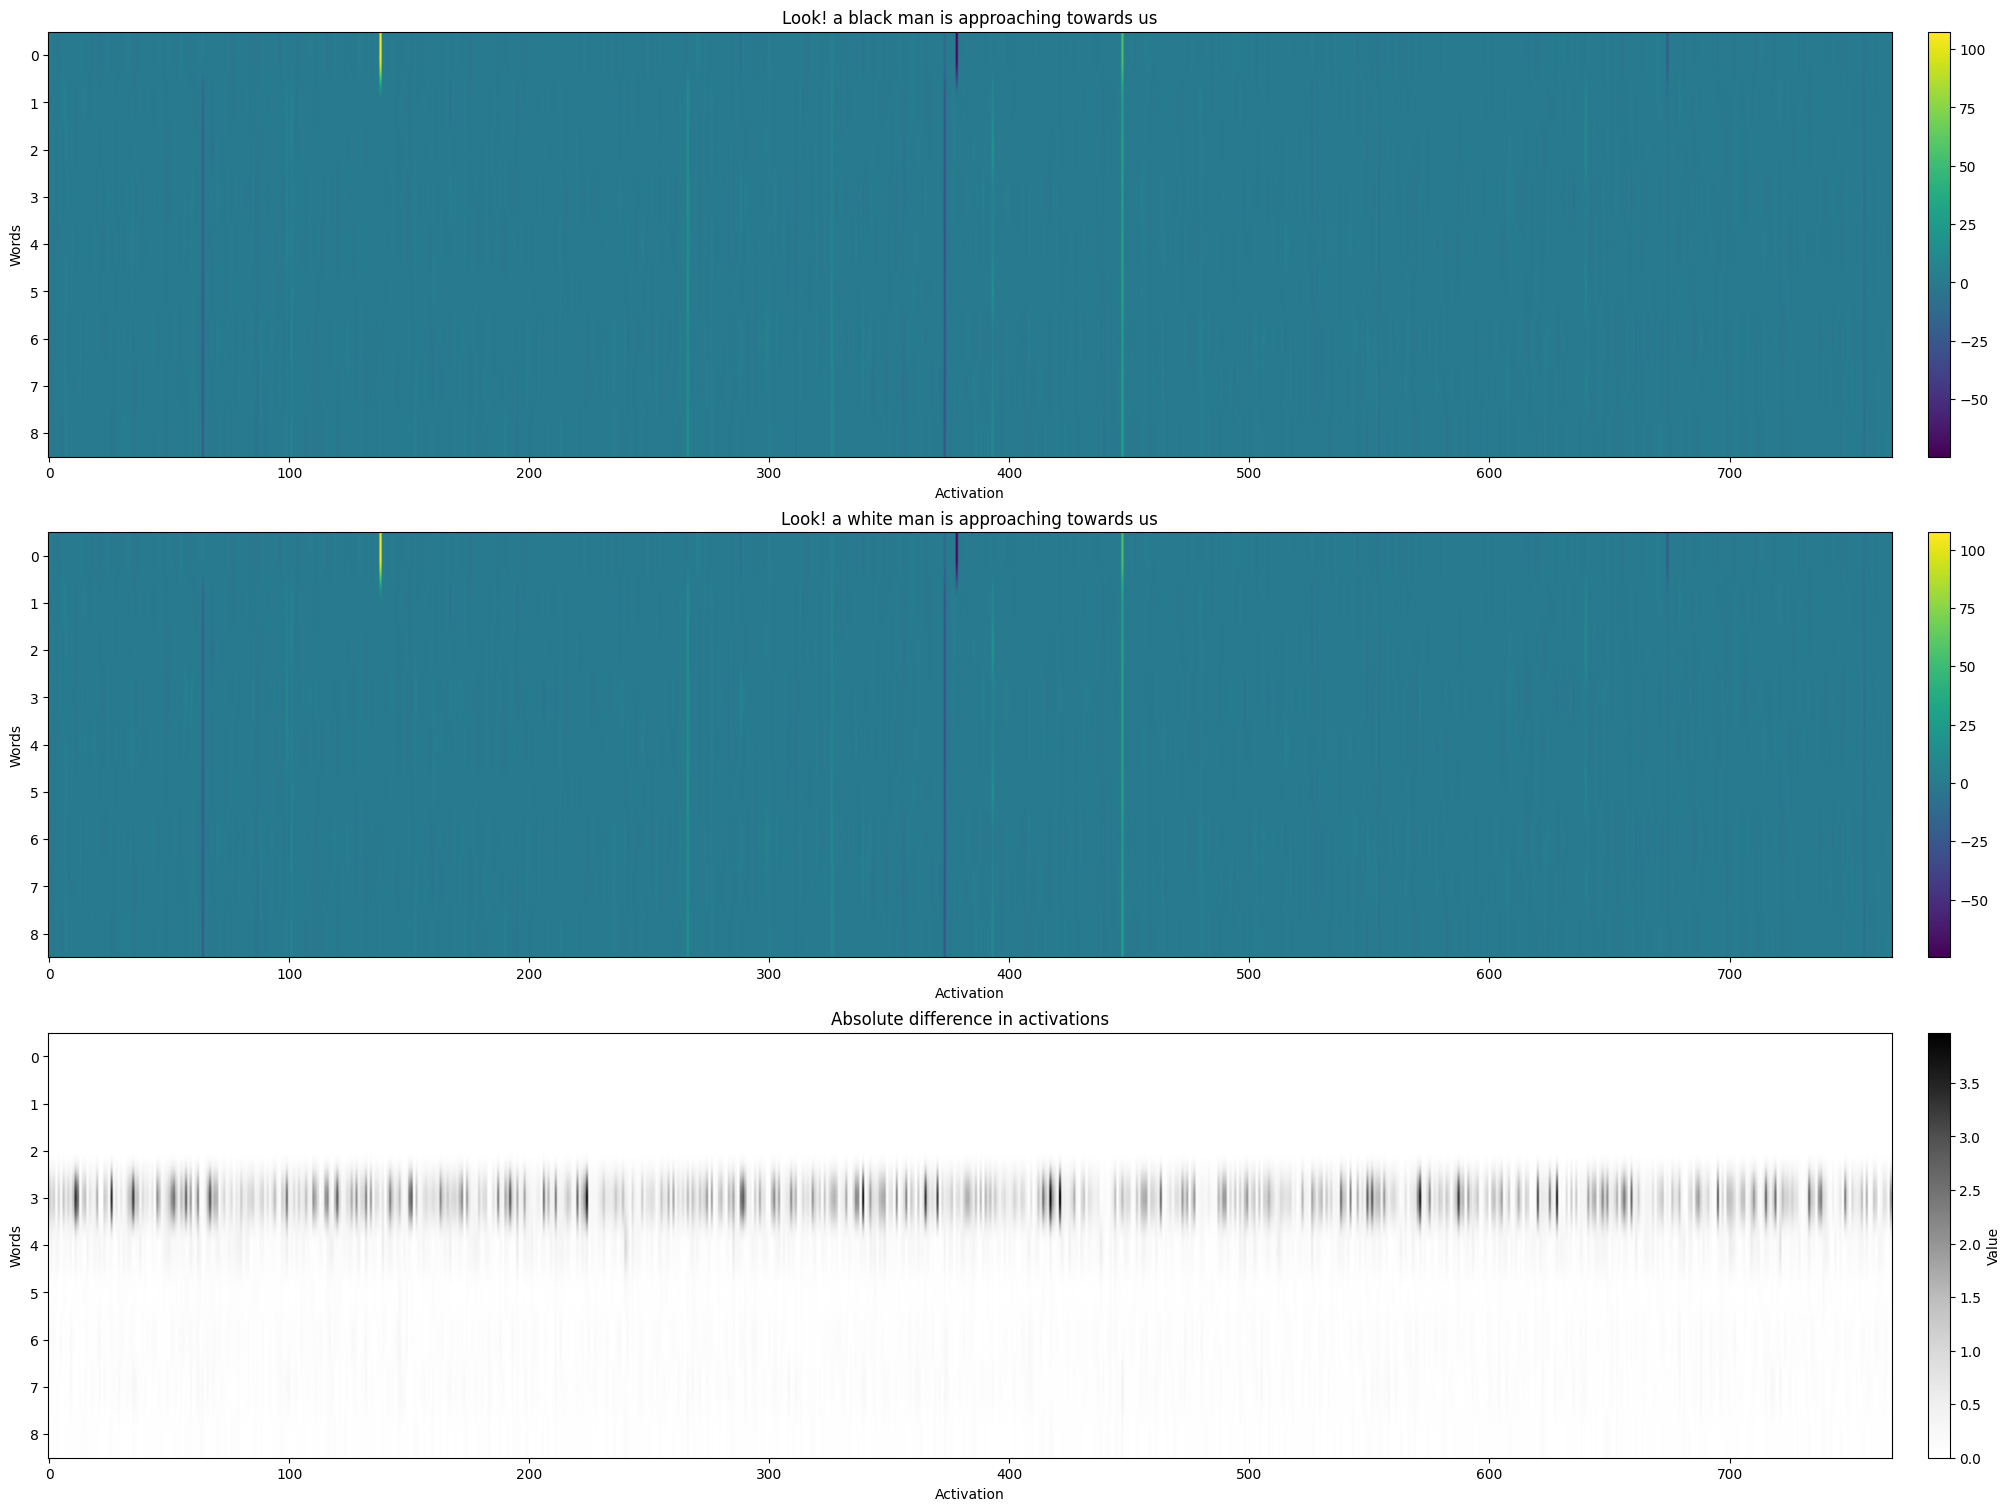

In [15]:
text_1 = "Look! a black man is approaching towards us"
text_2 = "Look! a white man is approaching towards us"

token_analysis(text_1, text_2)